# Titanic - Machine Learning from disaster

## --------------------------------------------------------------------------------------------------------------------- 

## Load libraries

In [54]:
import pandas as pd
import kaleido
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from joblib import dump, load
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

## Load data 

In [2]:
train_data = pd.read_csv('train.csv')
print(train_data.shape)
train_data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Remove unwanted columns

train_data = train_data.drop(columns=['Name', 'Ticket'])
print(train_data.shape)
train_data.head(10)

(891, 10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,male,54.0,0,0,51.8625,E46,S
7,8,0,3,male,2.0,3,1,21.0750,NaN,S
8,9,1,3,female,27.0,0,2,11.1333,NaN,S
9,10,1,2,female,14.0,1,0,30.0708,NaN,C


In [4]:
# Display NaN values in each column

train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_data = train_data.drop(columns=['Cabin'])
print(train_data.shape)
train_data.head(10)

(891, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


### Handle NaN values
- In 'Age' column
- In 'Embarked' column

In [6]:
# In 'Age' column

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [7]:
# In 'Embarked' column

train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [8]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Transforming columns with categorical data -- One-hot encoding
- 'Sex' column
- 'Embarked' column

In [9]:
train_data_copy = train_data
ohc = OneHotEncoder()
s = ohc.fit_transform(train_data.Sex.values.reshape(-1,1)).toarray()
e = ohc.fit_transform(train_data.Embarked.values.reshape(-1,1)).toarray()
df_s = pd.DataFrame(s, columns = ["Sex_"+str(i) for i in list(train_data.Sex.unique())])
df_e = pd.DataFrame(e, columns = ["Embarked_"+str(i) for i in list(train_data.Embarked.unique())]) 
train_data = pd.concat([train_data, df_s, df_e], axis=1)
#droping the country column 
train_data= train_data.drop(['Sex', 'Embarked'], axis=1) 
#printing to verify 
train_data.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
5,6,0,3,28.0,0,0,8.4583,0.0,1.0,0.0,1.0,0.0
6,7,0,1,54.0,0,0,51.8625,0.0,1.0,0.0,0.0,1.0
7,8,0,3,2.0,3,1,21.0750,0.0,1.0,0.0,0.0,1.0
8,9,1,3,27.0,0,2,11.1333,1.0,0.0,0.0,0.0,1.0
9,10,1,2,14.0,1,0,30.0708,1.0,0.0,1.0,0.0,0.0


In [10]:
X = train_data.drop(columns=['PassengerId', 'Survived'])
y = train_data['Survived']

X.shape, y.shape

((891, 10), (891,))

In [11]:
X.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
5,3,28.0,0,0,8.4583,0.0,1.0,0.0,1.0,0.0
6,1,54.0,0,0,51.8625,0.0,1.0,0.0,0.0,1.0
7,3,2.0,3,1,21.0750,0.0,1.0,0.0,0.0,1.0
8,3,27.0,0,2,11.1333,1.0,0.0,0.0,0.0,1.0
9,2,14.0,1,0,30.0708,1.0,0.0,1.0,0.0,0.0


In [12]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## SMOTE - Oversampling

In [13]:
oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)

In [14]:
# Plot the distribution
cat1 = train_data['Survived'].value_counts().to_dict()
cat2 = y.value_counts().to_dict()
classes = ['Not Survived', 'Survived']
counts1 = list(cat1.values())
counts2 = list(cat2.values())

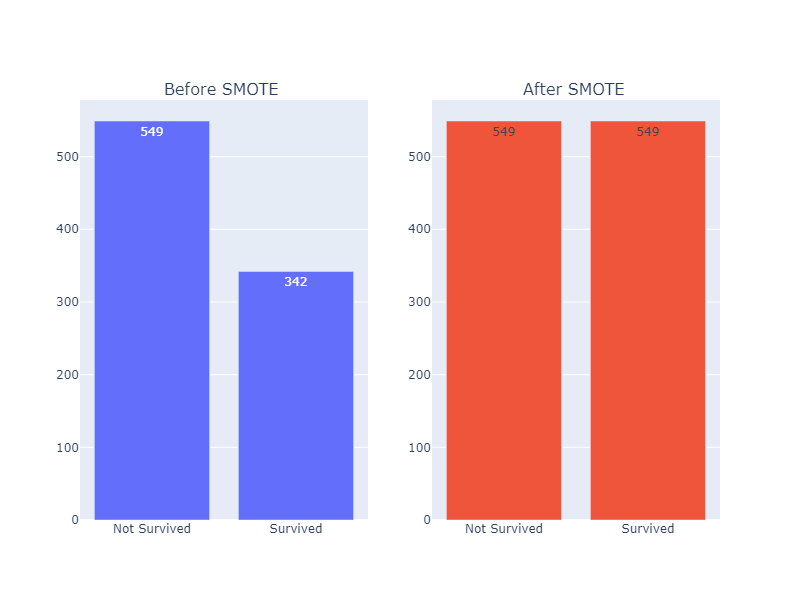

In [15]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Before SMOTE\n", "After SMOTE\n"))

fig.add_trace(
    go.Bar(
            x=classes, y=counts1,
            text=counts1,
            textposition='auto',
        ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
            x=classes, y=counts2,
            text=counts2,
            textposition='auto',
        ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False )
fig.show("png")

## Train-Val split

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
X_train.shape, y_train.shape

((878, 10), (878,))

In [18]:
X_val.shape, y_val.shape

((220, 10), (220,))

## Model Selection
    - Logistic regression
    - Decision tree
    - Gradient boosting
    - Random forest
    - SVM

### Logistic regression

In [19]:
lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)

In [20]:
lr.score(X_val, y_val)

0.8272727272727273

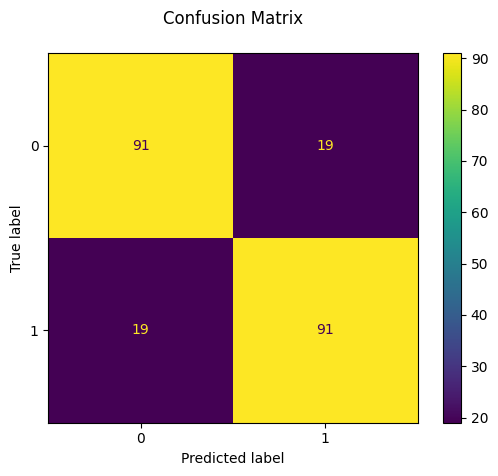

In [21]:
# Confusion matrix

cm = confusion_matrix(y_val, y_pred_lr, labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix\n")
plt.show()

In [22]:
# Classification report

print(metrics.classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.83      0.83      0.83       110

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.876


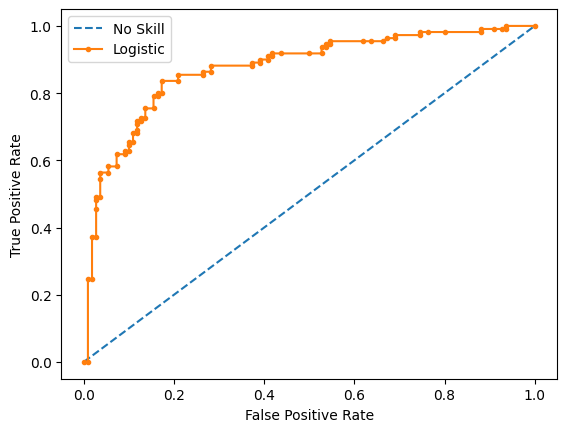

In [23]:
# ROC AUC

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val))]

lr_probs = lr.predict_proba(X_val)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### Decision Tree

In [24]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)

In [25]:
dt.score(X_val, y_val)

0.8136363636363636

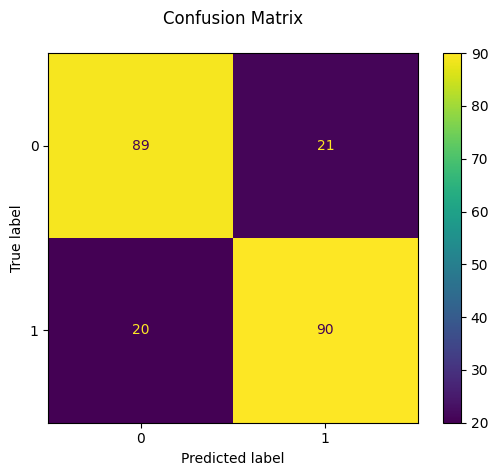

In [26]:
# Confusion matrix

cm = confusion_matrix(y_val, y_pred_dt, labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix\n")
plt.show()

In [27]:
# Classification report

print(metrics.classification_report(y_val, dt.predict(X_val)))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       110
           1       0.81      0.82      0.81       110

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220



No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.825


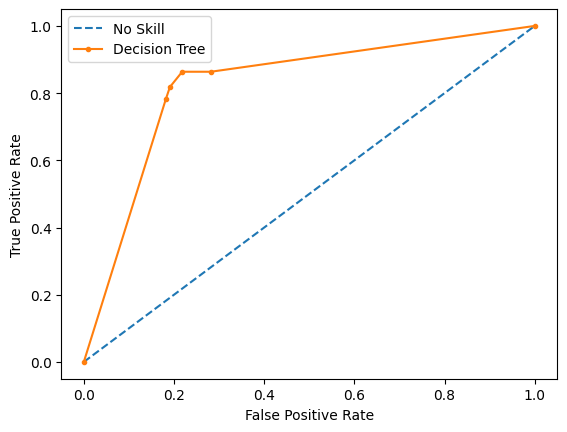

In [28]:
# ROC AUC

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val))]

dt_probs = dt.predict_proba(X_val)

# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
dt_auc = roc_auc_score(y_val, dt_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_val, dt_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### Gradient boosting

In [29]:
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)

In [30]:
gb.score(X_val, y_val)

0.8454545454545455

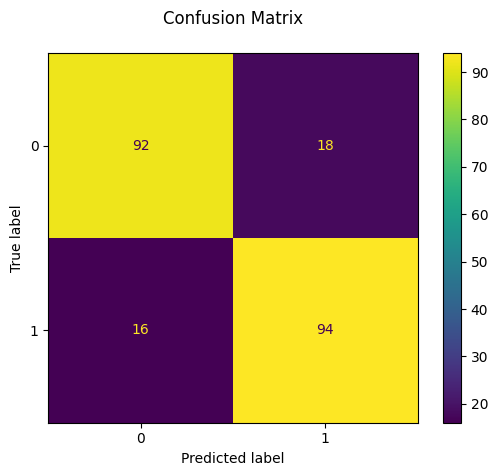

In [31]:
# Confusion matrix

cm = confusion_matrix(y_val, y_pred_gb, labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix\n")
plt.show()

In [32]:
# Classification report

print(metrics.classification_report(y_val, gb.predict(X_val)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.84      0.85      0.85       110

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



No Skill: ROC AUC=0.500
Gradient Boosting: ROC AUC=0.895


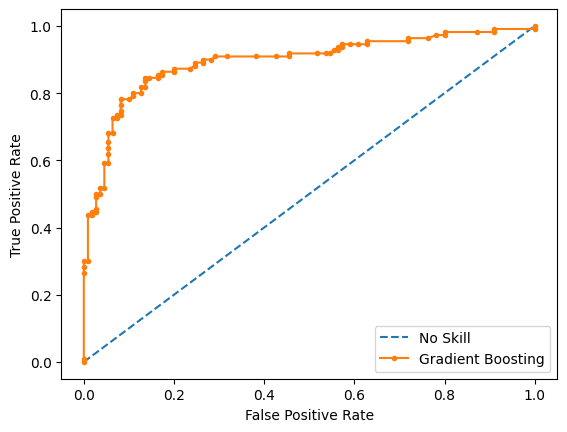

In [33]:
# ROC AUC

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val))]

gb_probs = gb.predict_proba(X_val)

# keep probabilities for the positive outcome only
gb_probs = gb_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
gb_auc = roc_auc_score(y_val, gb_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gradient Boosting: ROC AUC=%.3f' % (gb_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_val, gb_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### Random Forest

In [34]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, max_features=2)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

In [35]:
rf.score(X_val, y_val)

0.8681818181818182

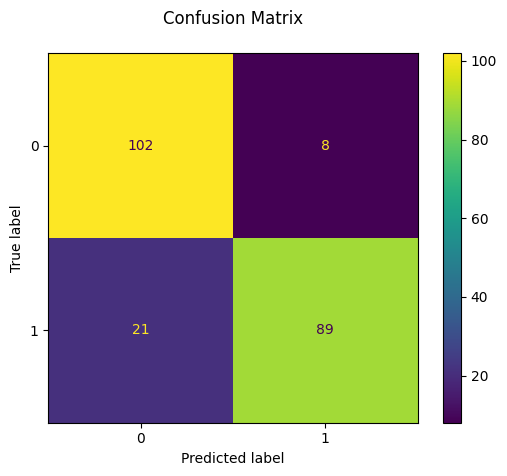

In [36]:
# Confusion matrix

cm = confusion_matrix(y_val, y_pred_rf, labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix\n")
plt.show()

In [37]:
# Classification report

print(metrics.classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       110
           1       0.92      0.81      0.86       110

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.895


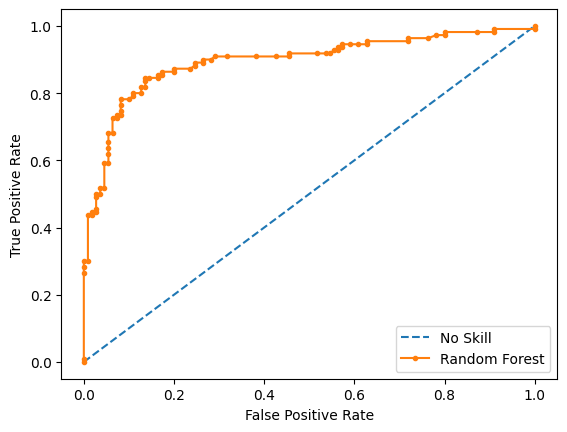

In [38]:
# ROC AUC

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val))]

rf_probs = gb.predict_proba(X_val)

# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
rf_auc = roc_auc_score(y_val, rf_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (gb_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### SVM

In [39]:
svm = SVC(random_state=42, kernel="linear", probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)

In [40]:
svm.score(X_val, y_val)

0.7545454545454545

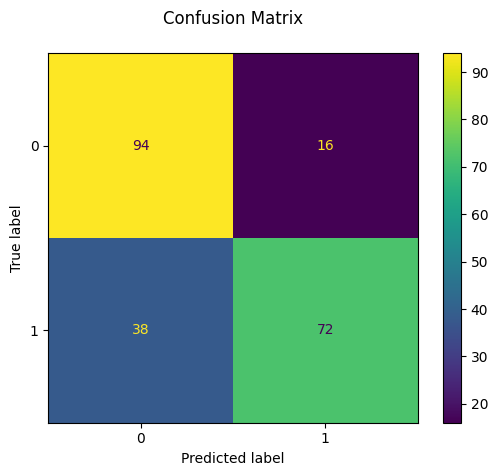

In [41]:
# Confusion matrix

cm = confusion_matrix(y_val, y_pred_svm, labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix\n")
plt.show()

In [42]:
# Classification report

print(metrics.classification_report(y_val, svm.predict(X_val)))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78       110
           1       0.82      0.65      0.73       110

    accuracy                           0.75       220
   macro avg       0.77      0.75      0.75       220
weighted avg       0.77      0.75      0.75       220



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.872


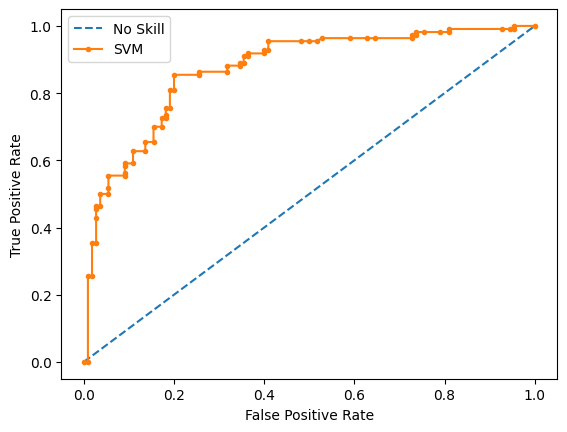

In [43]:
# ROC AUC

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val))]

svm_probs = svm.predict_proba(X_val)

# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
svm_auc = roc_auc_score(y_val, svm_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_val, svm_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

## Score plot for all the models

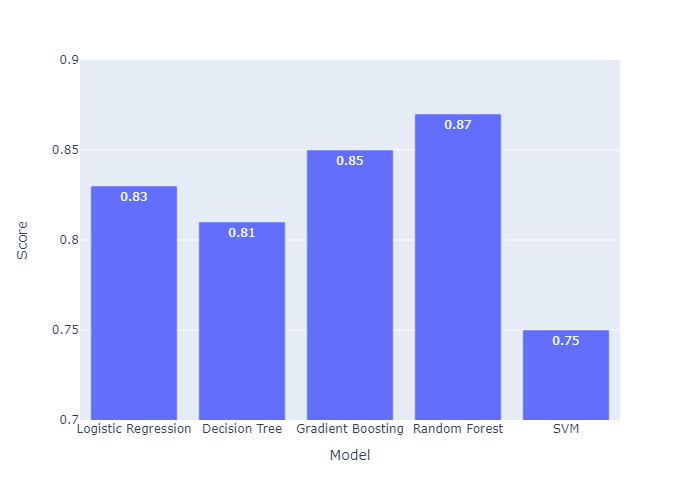

In [44]:
accuracy = {
    "Model": ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'SVM'],
    "Score": [round(lr.score(X_val, y_val), ndigits=2), round(dt.score(X_val, y_val), ndigits=2), 
              round(gb.score(X_val, y_val), ndigits=2), round(rf.score(X_val, y_val), ndigits=2),
              round(svm.score(X_val, y_val), ndigits=2)]
}

accuracy = pd.DataFrame(accuracy)

fig = px.bar(accuracy, x='Model', y='Score', text="Score")
fig.update_layout(yaxis_range=[0.7,0.9])
fig.show("png")

In [45]:
# Load test data

test_data = pd.read_csv('test.csv')
print(test_data.shape)
test_data.head(10)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Transform test data

In [46]:
test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [47]:
test_data.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [48]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [49]:
# ohc = OneHotEncoder()
s = ohc.fit_transform(test_data.Sex.values.reshape(-1,1)).toarray()
e = ohc.fit_transform(test_data.Embarked.values.reshape(-1,1)).toarray()
df_s = pd.DataFrame(s, columns = ["Sex_"+str(i) for i in list(train_data_copy.Sex.unique())])
df_e = pd.DataFrame(e, columns = ["Embarked_"+str(i) for i in list(train_data_copy.Embarked.unique())]) 
test_data = pd.concat([test_data, df_s, df_e], axis=1)
#droping the country column 
test_data= test_data.drop(['Sex', 'Embarked'], axis=1) 
#printing to verify 
test_data.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0
5,3,14.0,0,0,9.2250,0.0,1.0,0.0,0.0,1.0
6,3,30.0,0,0,7.6292,1.0,0.0,0.0,1.0,0.0
7,2,26.0,1,1,29.0000,0.0,1.0,0.0,0.0,1.0
8,3,18.0,0,0,7.2292,1.0,0.0,1.0,0.0,0.0
9,3,21.0,2,0,24.1500,0.0,1.0,0.0,0.0,1.0


In [50]:
y_pred_test = rf.predict(test_data)

## Prepare submission file

In [51]:
test_data = pd.read_csv('test.csv')
sub = {
    "PassengerID": list(test_data['PassengerId']),
    "Survived": list(y_pred_test)
}
sub = pd.DataFrame(sub)
sub.to_csv("titanic_submission.csv", index=False)

## Save the model

In [57]:
dump(rf , 'rf.joblib')
# rf = load(rf.joblib)

['rf.joblib']

In [59]:
model = load('rf.joblib')

In [117]:
sample = {
  "Ticket Class": "3rd",
  "Sex": "Male",
  "Age": 22,
  "Siblings/Spouses": 1,
  "Parents/Children": 0,
  "Ticket fare": 7.25,
  "Port of Embarkation": "Cherbourg"
}

In [118]:
X_sample = list(sample.values())
X_sample

['3rd', 'Male', 22, 1, 0, 7.25, 'Cherbourg']

In [119]:
if sample['Ticket Class'] == "1st":
    X_sample[0] = 1
elif sample['Ticket Class'] == "2nd":
    X_sample[0] = 2
elif sample['Ticket Class'] == "3rd":
    X_sample[0] = 3
X_sample

[3, 'Male', 22, 1, 0, 7.25, 'Cherbourg']

In [120]:
if sample['Port of Embarkation'] == "Southampton":
    X_sample[6] = 'S'
elif sample['Port of Embarkation'] == "Queenstown":
    X_sample[6] = 'Q'
elif sample['Port of Embarkation'] == "Cherbourg":
    X_sample[6] = 'C'
X_sample

[3, 'Male', 22, 1, 0, 7.25, 'C']

In [121]:
X_transformed = []
if X_sample[1] == 'Male' and X_sample[6] == 'S':
    X_transformed = [X_sample[0], 1, 0, X_sample[2], X_sample[3], X_sample[4], X_sample[5], 1, 0, 0]
elif X_sample[1] == 'Male' and X_sample[6] == 'C':
    X_transformed = [X_sample[0], 1, 0, X_sample[2], X_sample[3], X_sample[4], X_sample[5], 0, 1, 0]
elif X_sample[1] == 'Male' and X_sample[6] == 'Q':
    X_transformed = [X_sample[0], 1, 0, X_sample[2], X_sample[3], X_sample[4], X_sample[5], 0, 0, 1]
elif X_sample[1] == 'Female' and X_sample[6] == 'S':
    X_transformed = [X_sample[0], 0, 1, X_sample[2], X_sample[3], X_sample[4], X_sample[5], 1, 0, 0]
elif X_sample[1] == 'Female' and X_sample[6] == 'C':
    X_transformed = [X_sample[0], 0, 1, X_sample[2], X_sample[3], X_sample[4], X_sample[5], 0, 1, 0]
elif X_sample[1] == 'Female' and X_sample[6] == 'Q':
    X_transformed = [X_sample[0], 0, 1, X_sample[2], X_sample[3], X_sample[4], X_sample[5], 0, 0, 1]
X_transformed

[3, 1, 0, 22, 1, 0, 7.25, 0, 1, 0]

In [122]:
X_pred = {
    'Pclass' : [X_transformed[0]],
     'Age' : [X_transformed[1]],
     'SibSp' : [X_transformed[2]],
     'Parch' : [X_transformed[3]],
     'Fare' : [X_transformed[4]],
     'Sex_male' : [X_transformed[5]],
     'Sex_female' : [X_transformed[6]],
     'Embarked_S' : [X_transformed[7]],
     'Embarked_C' : [X_transformed[8]],
     'Embarked_Q' : [X_transformed[9]]
}
X_pred = pd.DataFrame.from_dict(X_pred)
X_pred

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
0,3,1,0,22,1,0,7.25,0,1,0


In [123]:
prediction = model.predict(X_pred)
prediction

array([0], dtype=int64)

In [124]:
if prediction[0] == 0:
    print("RIP!")
elif prediction[0] == 1:
    print("You survived, by god's grace!")

RIP!
